# Classification Project

## File IO

Only File IO...

You may not change this code.

In [1]:
# Base Module of data processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
from tkinter.filedialog import askopenfilename
import pandas as pd
import tkinter
import os

# tk_window = tkinter.Tk()
# cwd = os.getcwd()

# tr_data = pd.read_csv(askopenfilename(title='Choose your training data'))
tr_data = pd.read_csv('../../13week_project_data/Wine_Quality_Data/tr_data.csv')
# tr_ans = pd.read_csv(askopenfilename(title='Choose your training answer'))
tr_ans = pd.read_csv('../../13week_project_data/Wine_Quality_Data/tr_ans.csv')

tr_ans = tr_ans.iloc[:, 0]

# ts_data = pd.read_csv(askopenfilename(title='Choose your test data'))
ts_data = pd.read_csv('../../13week_project_data/Wine_Quality_Data/ts_data.csv')

# tk_window.destroy()

s1 = pd.Series(tr_ans, name = 'color')
data = pd.concat([tr_data, s1], axis=1)

original_data = data.copy()

# if data.shape[0] > 3250:
    


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data.drop(['quality'], axis=1, inplace=True)

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

data['color'] = lb.fit_transform(data['color'])

# pd.value_counts(data['color'].values.ravel())

In [4]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# feature_names = data.columns
# for i in range(len(feature_names)-1):
#     figure = plt.figure()
#     ax = sns.boxplot(x='color', y=feature_names[i], data=data)

In [5]:
df = data.copy(deep=True)

types = df['color'].unique()
d = {type: df[df['color'] == type] for type in types}

# d[1]

In [6]:
low = .25
high = .75

bounds = {}
for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'color']
    quant_df = filt_df.quantile([low, high])
    IQR = quant_df.iloc[1,:]- quant_df.iloc[0,:]
    quant_df.iloc[0,:] = quant_df.iloc[0,:] - 1.5*IQR
    quant_df.iloc[1,:] = quant_df.iloc[1,:] + 1.5*IQR
    bounds[type] = quant_df
    
# bounds[1]

In [7]:
filt_df = d[1].loc[:, d[1].columns != 'color'] # Remove 'Type' Column
filt_df = filt_df.apply(lambda x: x[(x>bounds[1].loc[low,x.name]) & (x < bounds[1].loc[high,x.name])], axis=0)
filt_df = pd.concat([filt_df,d[1].loc[:,'color']], axis=1)

# filt_df

In [8]:
df_new = {}

for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'color'] # Remove 'Type' Column
    filt_df = filt_df.apply(lambda x: x[(x>bounds[type].loc[low,x.name]) & (x < bounds[type].loc[high,x.name])], axis=0)
    df_new[type] = pd.concat([filt_df,d[type].loc[:,'color']], axis=1)


data_new = result = pd.concat(df_new)
# data_new

In [9]:
# Now we have our glass data that has all outliers removed
# Check out the boxplot again

# for i in range(len(feature_names)-1):
#     figure = plt.figure()
#     ax = sns.boxplot(x='color', y=feature_names[i], data=data_new)

In [10]:
# 지워
# types = np.unique(train['color'])

# for i in range(len(types)):
#     fig = plt.figure()
#     average = data_new[[data_new.columns[i], "color"]].groupby(['color'],as_index=False).mean()
#     sns.barplot(x = 'color', y = data_new.columns[i], data= average)

In [11]:
# data[data['color'] == 1]

In [12]:
# data[data['color'] == 0]

In [13]:
# data with outliers removed 
# data.head()
# y_data = data['color']
# x_data = data.drop(data.columns[len(data.columns)-1], axis=1)

# from sklearn.model_selection import train_test_split
# # Split as train data and test data
# tr_data, ts_data, tr_ans, ts_ans = train_test_split(x_data, y_data, test_size=0.5, shuffle=True)


# original data
# original_data['color'] = lb.fit_transform(original_data['color'])

# y_data = original_data['color']
# x_data = data.drop(data.columns[len(data.columns)-1],axis=1)

# from sklearn.model_selection import train_test_split
# # Split as train data and test data
# tr_data, ts_data, tr_ans, ts_ans = train_test_split(x_data, y_data, test_size=0.5, shuffle=True)

## Predict Algorithm

Type your source code (Champion Algorithm)

In [14]:
# data_df = pd.DataFrame(ts_data)
# data_df.to_csv("Iris_ts_data.csv", mode='w')
# ans_df = pd.DataFrame(ts_ans)
# ans_df.to_csv("Iris_ts_ans.csv", mode='w')

# # KNN, neighbors=5
# from sklearn.neighbors import KNeighborsClassifier
# KNN = KNeighborsClassifier(n_neighbors=5)
# KNN = KNN.fit(tr_data, tr_ans)
# y_pred = KNN.predict(ts_data)

# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_KNN5.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # GNB
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb = gnb.fit(tr_data, tr_ans)
# y_pred = gnb.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_GNB.csv", mode='w')
# print(accuracy(ts_ans, y_pred))
               
# # SVM
# from sklearn.svm import LinearSVC
# LinSVC = LinearSVC()
# LinSVC = LinSVC.fit(tr_data, tr_ans)
# y_pred = LinSVC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_SVM.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# Bagging
# from sklearn.ensemble import BaggingClassifier
# BC = BaggingClassifier(n_estimators=50)
# BC = BC.fit(tr_data, tr_ans)
# y_pred = BC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_Bagging.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF = RF.fit(tr_data, tr_ans)
y_pred = RF.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_RF.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # GradientBoosting
# from sklearn.ensemble import GradientBoostingClassifier
# GBC = GradientBoostingClassifier()
# GBC = GBC.fit(tr_data, tr_ans)
# y_pred = GBC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_GB.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # AdaBoosting
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# ABC = AdaBoostClassifier()
# ABC = ABC.fit(tr_data, tr_ans)
# y_pred = ABC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_AB.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("output.csv", mode='w')

# End of Demo

C:\Users\Susan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Check Accuracy

Only for check accuracy

In [15]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

tk_window = tkinter.Tk()
cwd = os.getcwd()
ts_ans = pd.read_csv(askopenfilename(title='Choose your test answer'))
ts_ans = ts_ans.iloc[:, 0]
tk_window.destroy()

print(accuracy(ts_ans, y_pred))

0.99153194765204


F-Score: 0.992
Accuracy:  0.99153194765204
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       331
          1       0.99      0.99      0.99       968

avg / total       0.99      0.99      0.99      1299



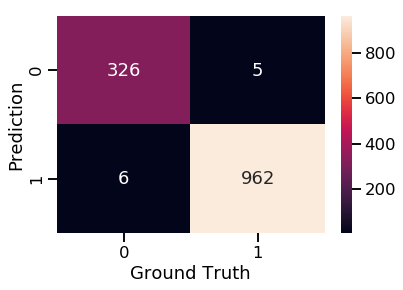

In [16]:
p,r,f,s = precision_recall_fscore_support(ts_ans, y_pred, average='micro')
print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(ts_ans, y_pred))

print(classification_report(ts_ans, y_pred))

labels = sorted(ts_ans.unique())
chart = pd.DataFrame(confusion_matrix(ts_ans, y_pred),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(chart, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');